In [20]:
# birdy client for communication with the server:
from birdy import WPSClient
# import birdy 

# handling files and folders
from os import path, listdir
from urllib import request
import time

# to display external png graphics in notebook: 
from IPython.display import Image
from IPython.core.display import HTML 

In [230]:
# on serverside :
# conda activate finch 
# finch start -c etc/custom.cfg 

fp_server = 'http://localhost:8093/wps'    # flyingpigeon
fp_i = WPSClient(fp_server, progress=True)
fp = WPSClient(fp_server)


In [49]:
# read in the existing Indices based on bias_adjusted tas files:
tas_bbox = '/home/nils/nap_niger/data/adjust/indices/'
tasInd_bbox = [ tas_bbox+f for f in listdir(tas_bbox) if '.nc' in f ]
tas_NER = '/home/nils/nap_niger/data/adjust/NER/'
tasInd_NER = [ tas_NER+f for f in listdir(tas_NER) if '.nc' in f ]


# read in the existing Indices based on pr files (!!! not bias adjusted, so far !!!):
pr_bbox = '/home/nils/nap_niger/data/bbox/indices/'
prInd_bbox = [ pr_bbox+f for f in listdir(pr_bbox) if '.nc' in f ]
pr_NER = '/home/nils/nap_niger/data/NER/indices/'
prInd_NER = [ pr_NER+f for f in listdir(pr_NER) if '.nc' in f ]


tasInd_NER.sort()
tasInd_bbox.sort()
prInd_bbox.sort()
prInd_NER.sort()


print(len(tasInd_bbox), len(tasInd_NER))
print(len(prInd_bbox), len(prInd_NER))


16 16
88 88


In [437]:
# Caluclated indices
# frequencies
freq=['yr','mon']

# precipitation indices
pr_indices = ['prcptot','rx1day','wetdays','cdd','cwd','sdii','max_5_day_precipitation_amount']
tas_indices = ['tg-mean']

titles = ['Somme annuelle de précipitations', 
          'Jour de plus fortes précipitations',
          'Nombre de jours humide',
          'Journées consécutives de sécheresse', 
          'Jours humides consécutifs', 
           "Index d'intensité de précipitations", 
          'Précipitations somme max. sur 5 jours consécutifs']

dates = ['1976-01-01', '2005-12-31', '2036-01-01', '2065-12-31', '2071-01-01', '2100-12-31']

In [465]:
i = 5
indicie = pr_indices[i]

resource = [f for f in prInd_NER if indicie in f and '_yr_' in f]
out = fp_i.plot_uncertainty(resource=resource, title=titles[i], # delta = -273.15,
                            figsize='9,5', ymin=0, ymax=14  # 
                           )

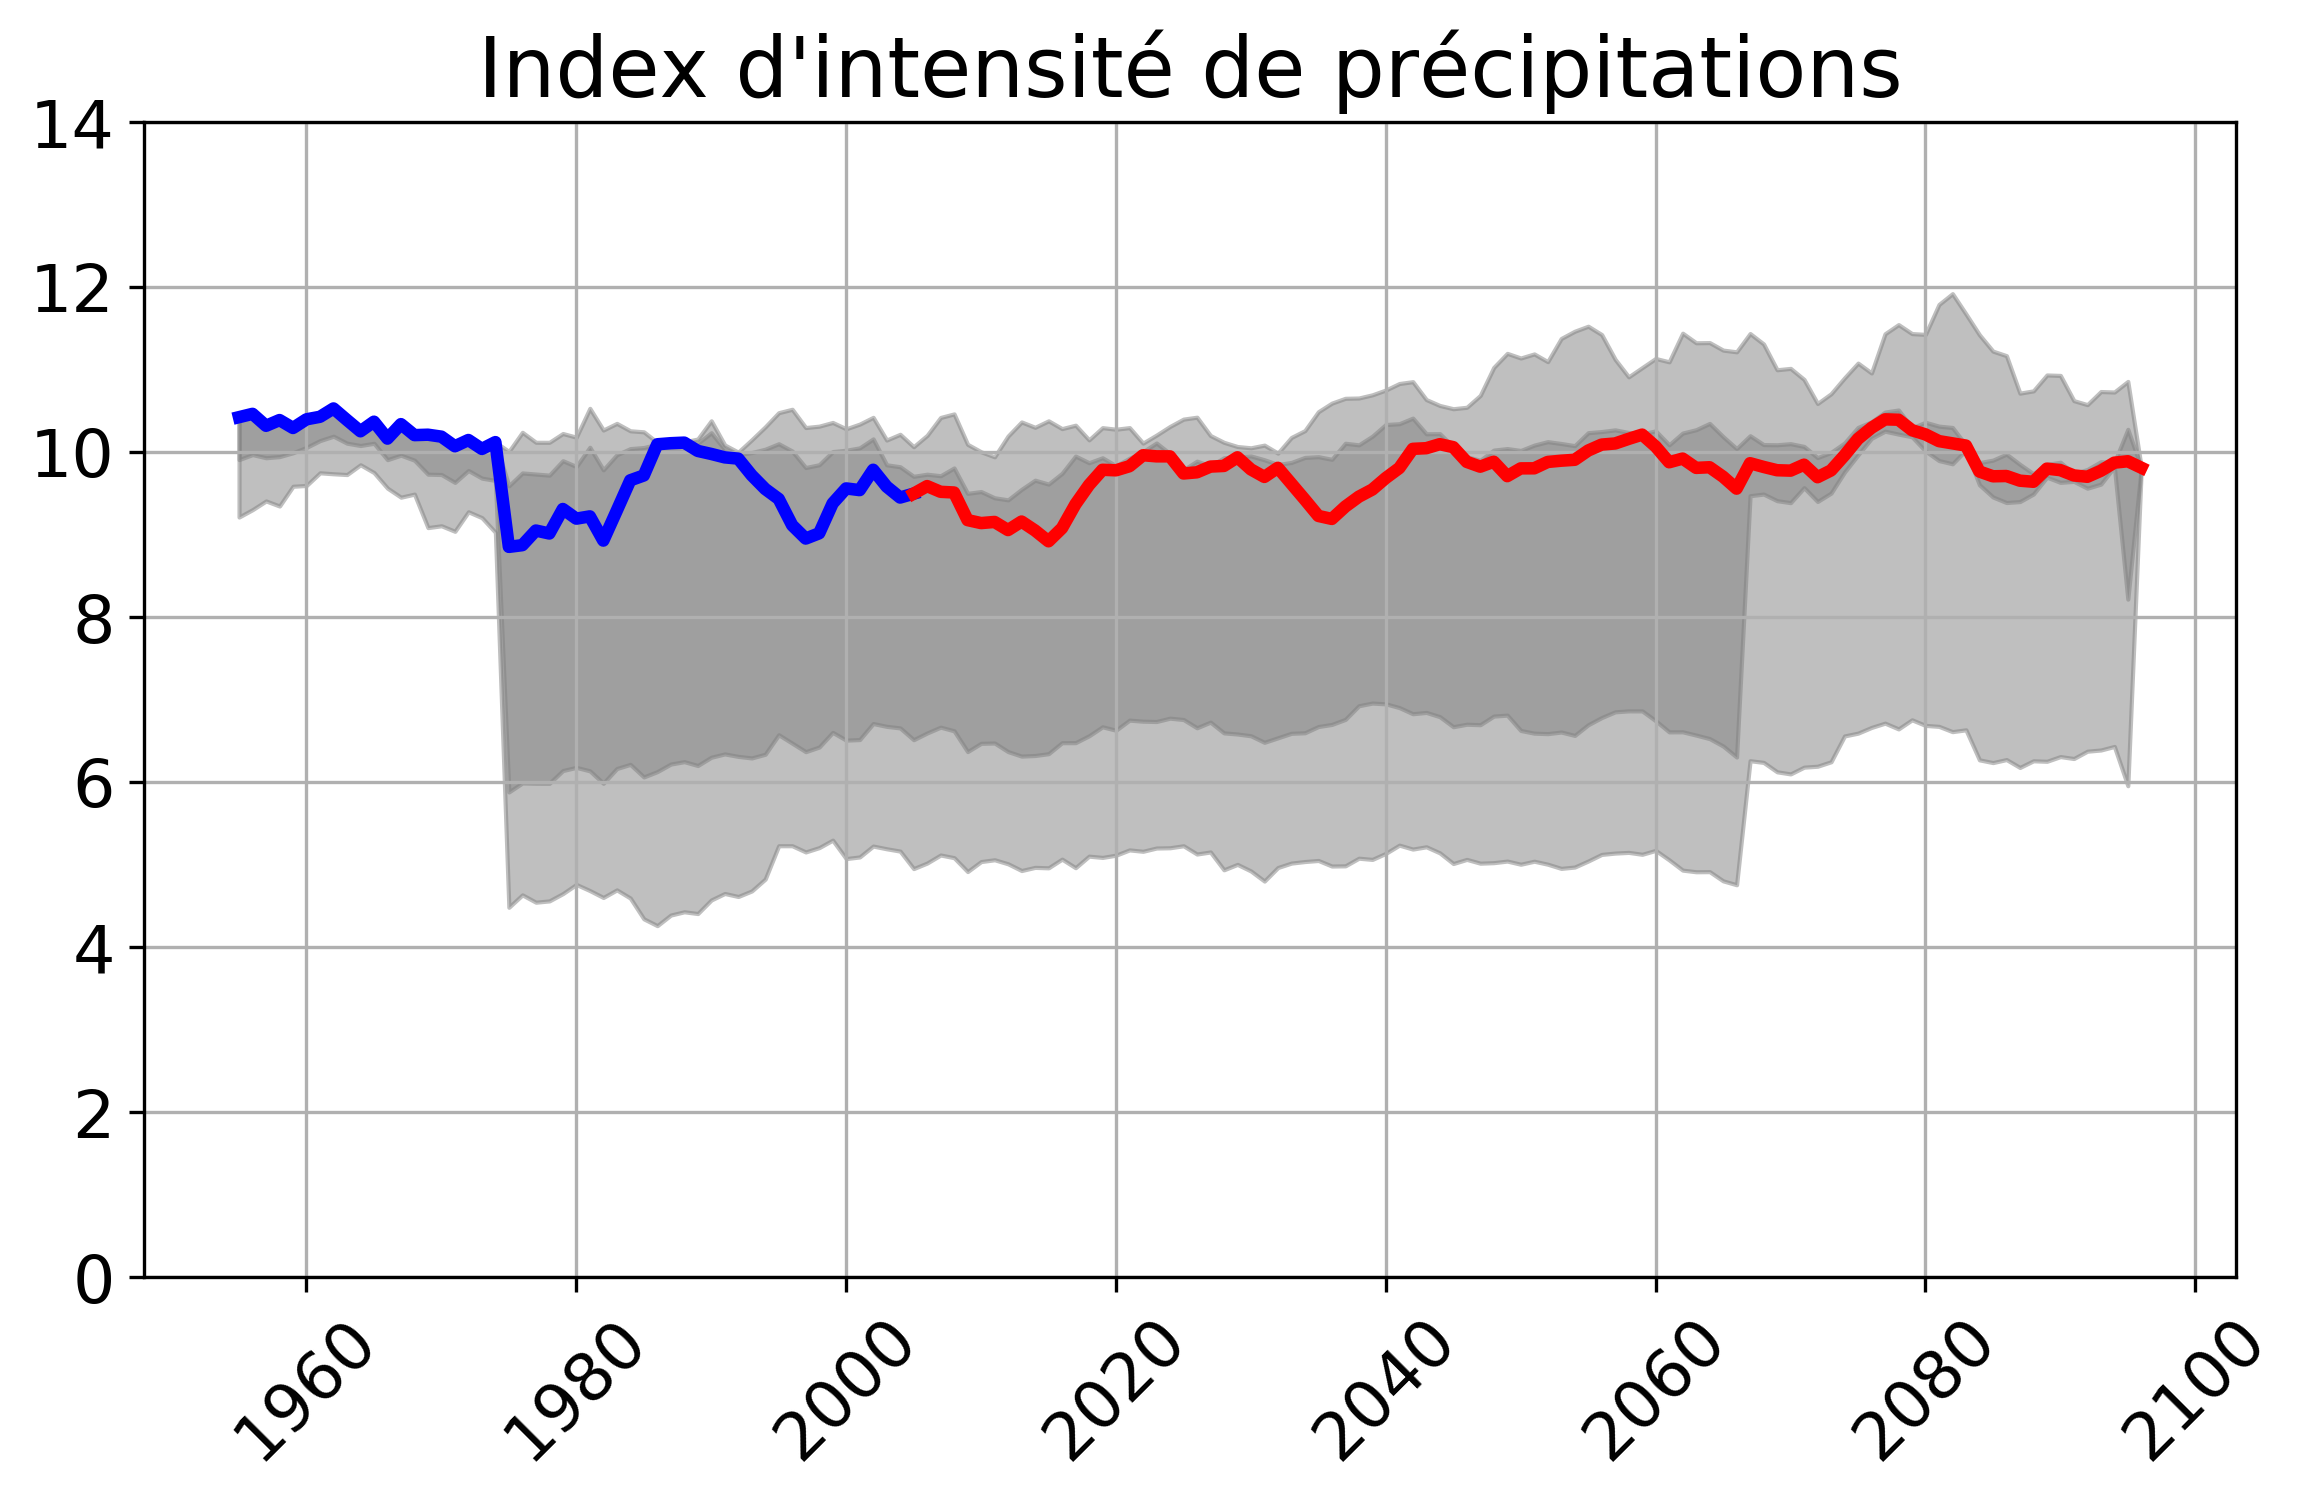

In [466]:
out_file = '/home/nils/nap_niger/NAP_Niger/pics/Timeseries_{}.png'.format(indicie)

request.urlretrieve(out.get()[0], out_file)
Image(out_file, width=400)


In [362]:


hist = [f for f in resource if 'historical' in f]
out = fp_i.plot_map_timemean(resource=hist, title='historical refernence (1971-2000)',
                             vmin=0,  vmax=15, # figsize='7,7', # delta = -273.15,
                             datestart='1971-01-01', dateend='2000-12-31',
                             cmap='Blues') # 


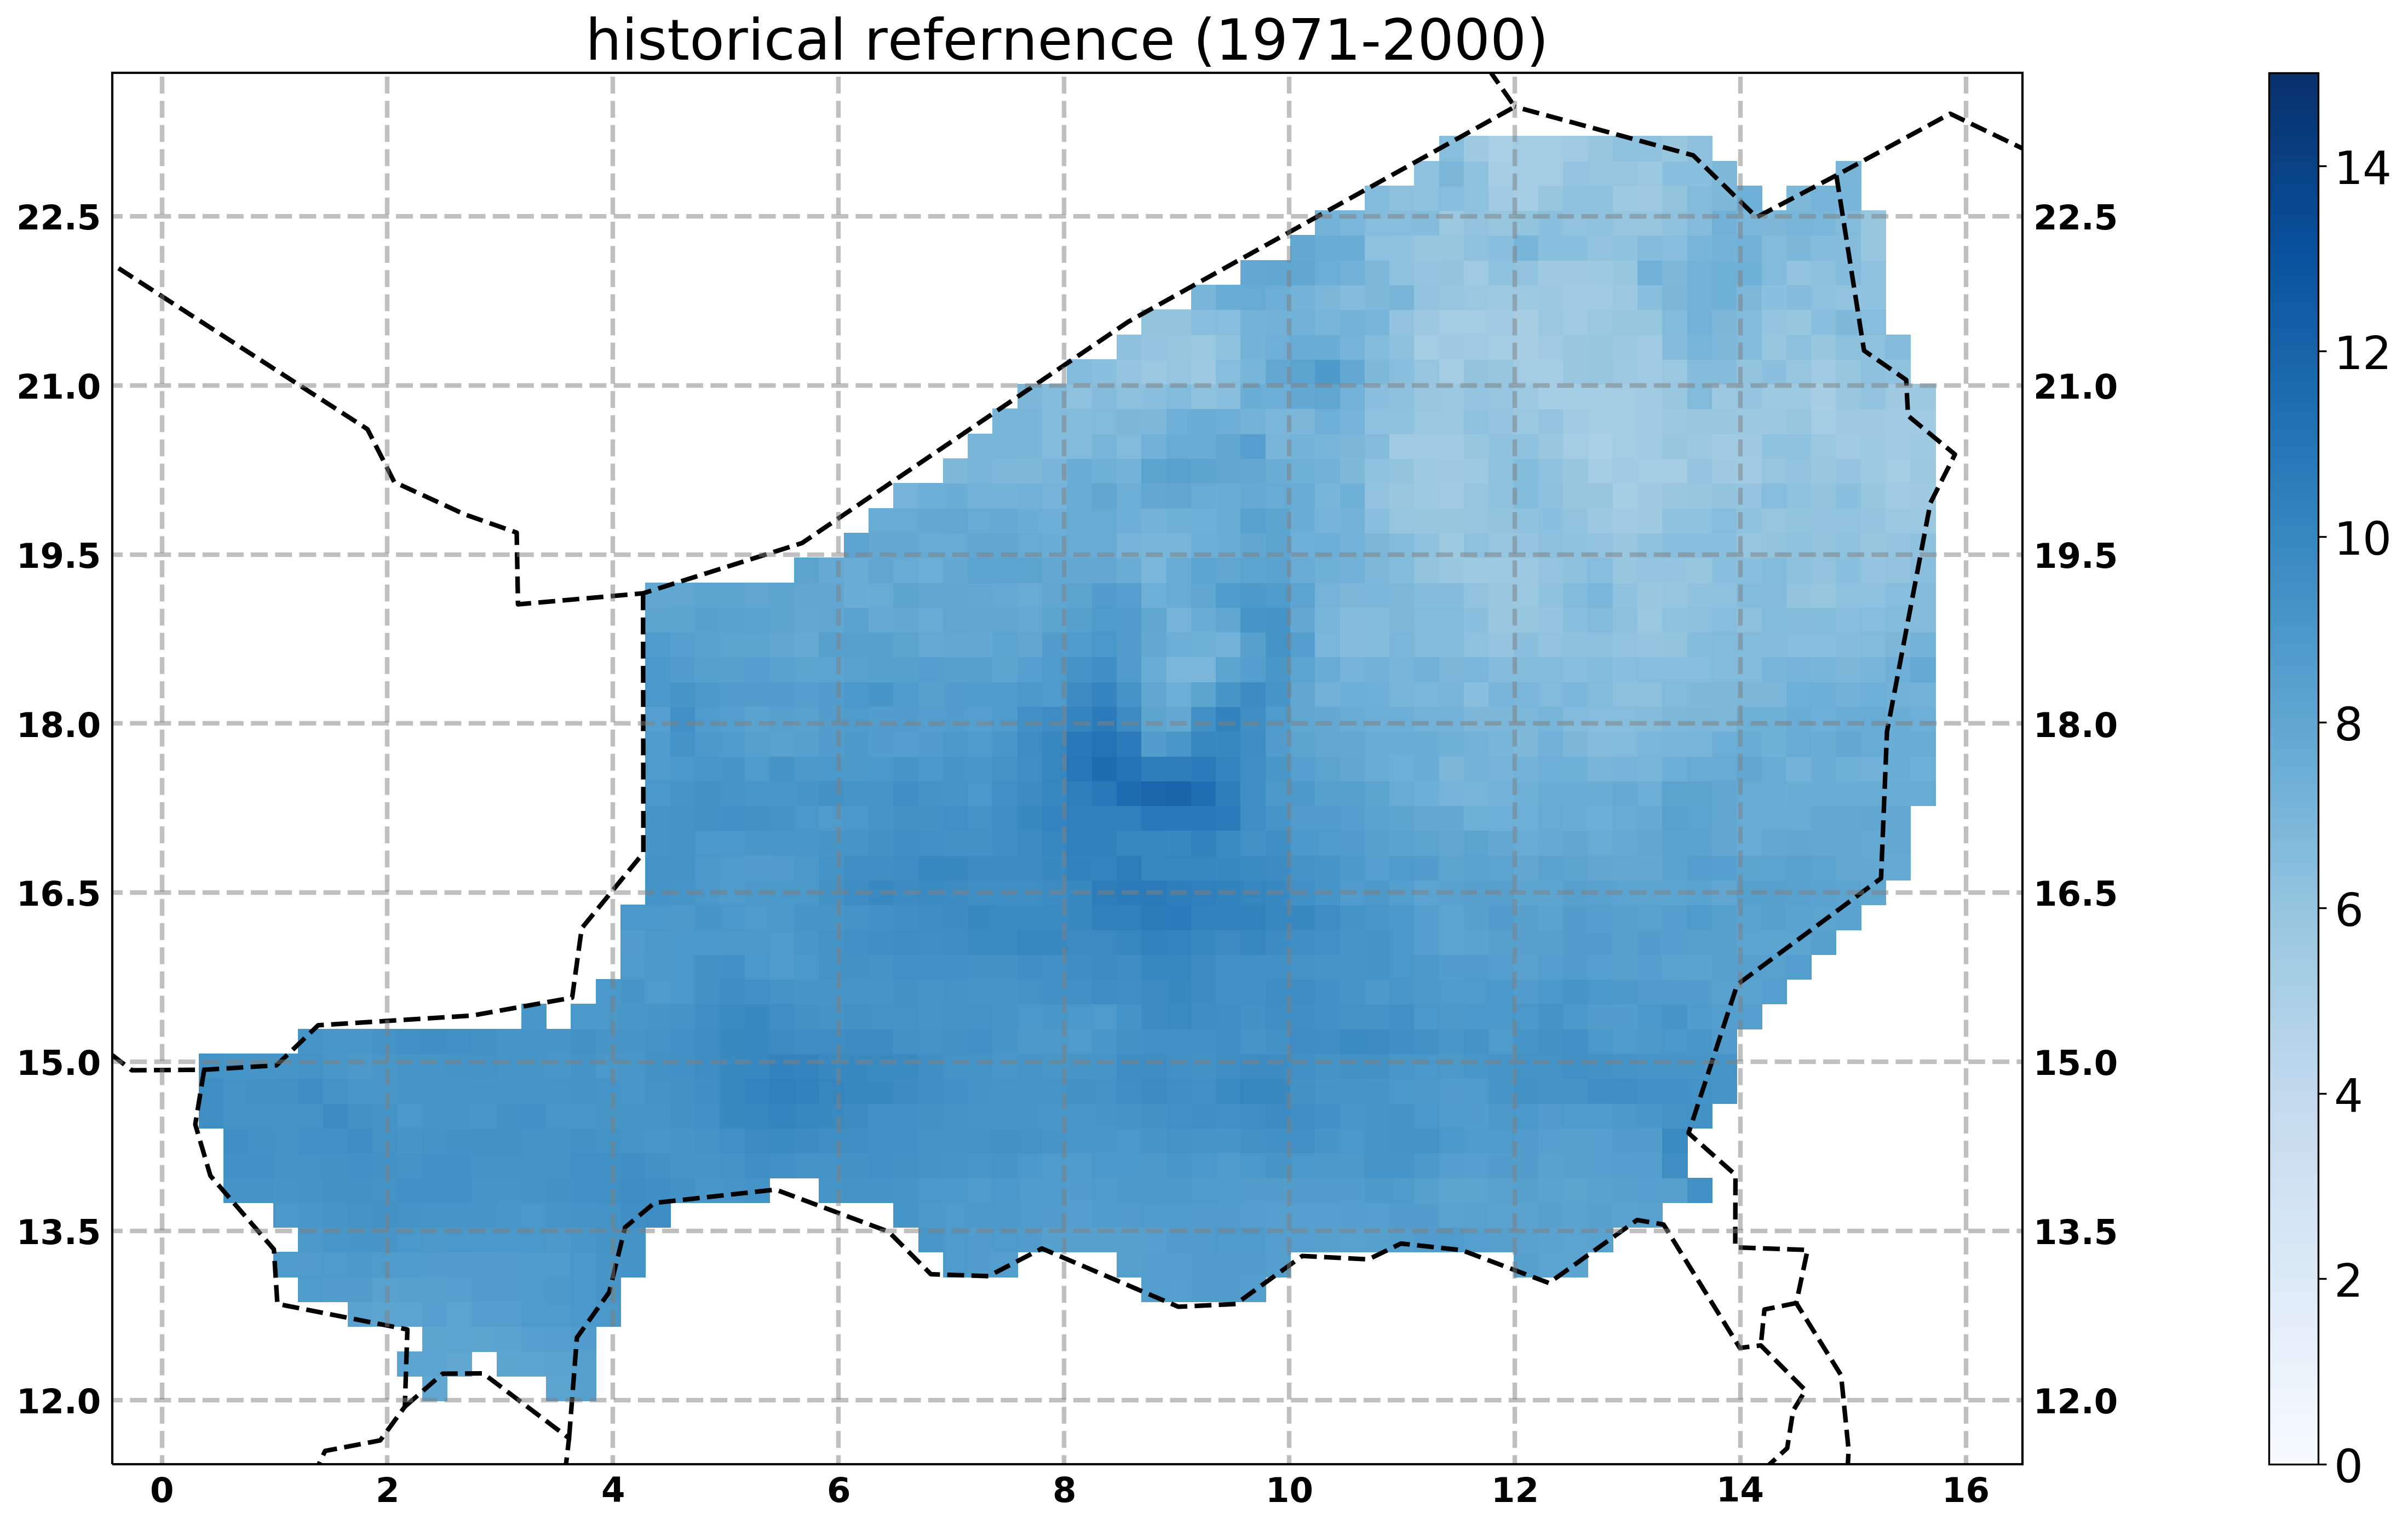

In [223]:
out_file = '/home/nils/nap_niger/NAP_Niger/pics/ref_historical_{}.png'.format(indicie)

request.urlretrieve(out.get()[0], out_file)
Image(out_file, width=400)


In [347]:

fp_server = 'http://localhost:8093/wps'    # flyingpigeon
fp_i = WPSClient(fp_server, progress=True)
fp = WPSClient(fp_server)


In [475]:

# find the corresponding files 
# indicie = pr_indices[5]
fr = freq[0]
experiment = 'rcp26'

ref = [f for f in prInd_bbox if indicie in f and fr in f and 'historical' in f]
proj = [f for f in prInd_bbox if indicie in f and fr in f and experiment in f]

# ref = [f for f in tasInd_bbox if indicie in f and fr in f and 'historical' in f]
# proj = [f for f in tasInd_bbox if indicie in f and fr in f and experiment in f]
futures = ['2036-2065', '2071-2100']

In [478]:
datestart_proj=dates[4],
dateend_proj=dates[5]

out = fp_i.climatechange_signal(resource_ref=ref,
                                resource_proj=proj,
                                variable=indicie,
                                title='Scenario {} {} ({})'.format(experiment, indicie, futures[1]),
                                datestart_ref=dates[0],
                                dateend_ref=dates[1],
                                datestart_proj=datestart_proj,
                                dateend_proj=dateend_proj,
                                vmin=-5 , vmax=5,
                                cmap='BrBG'
                               )

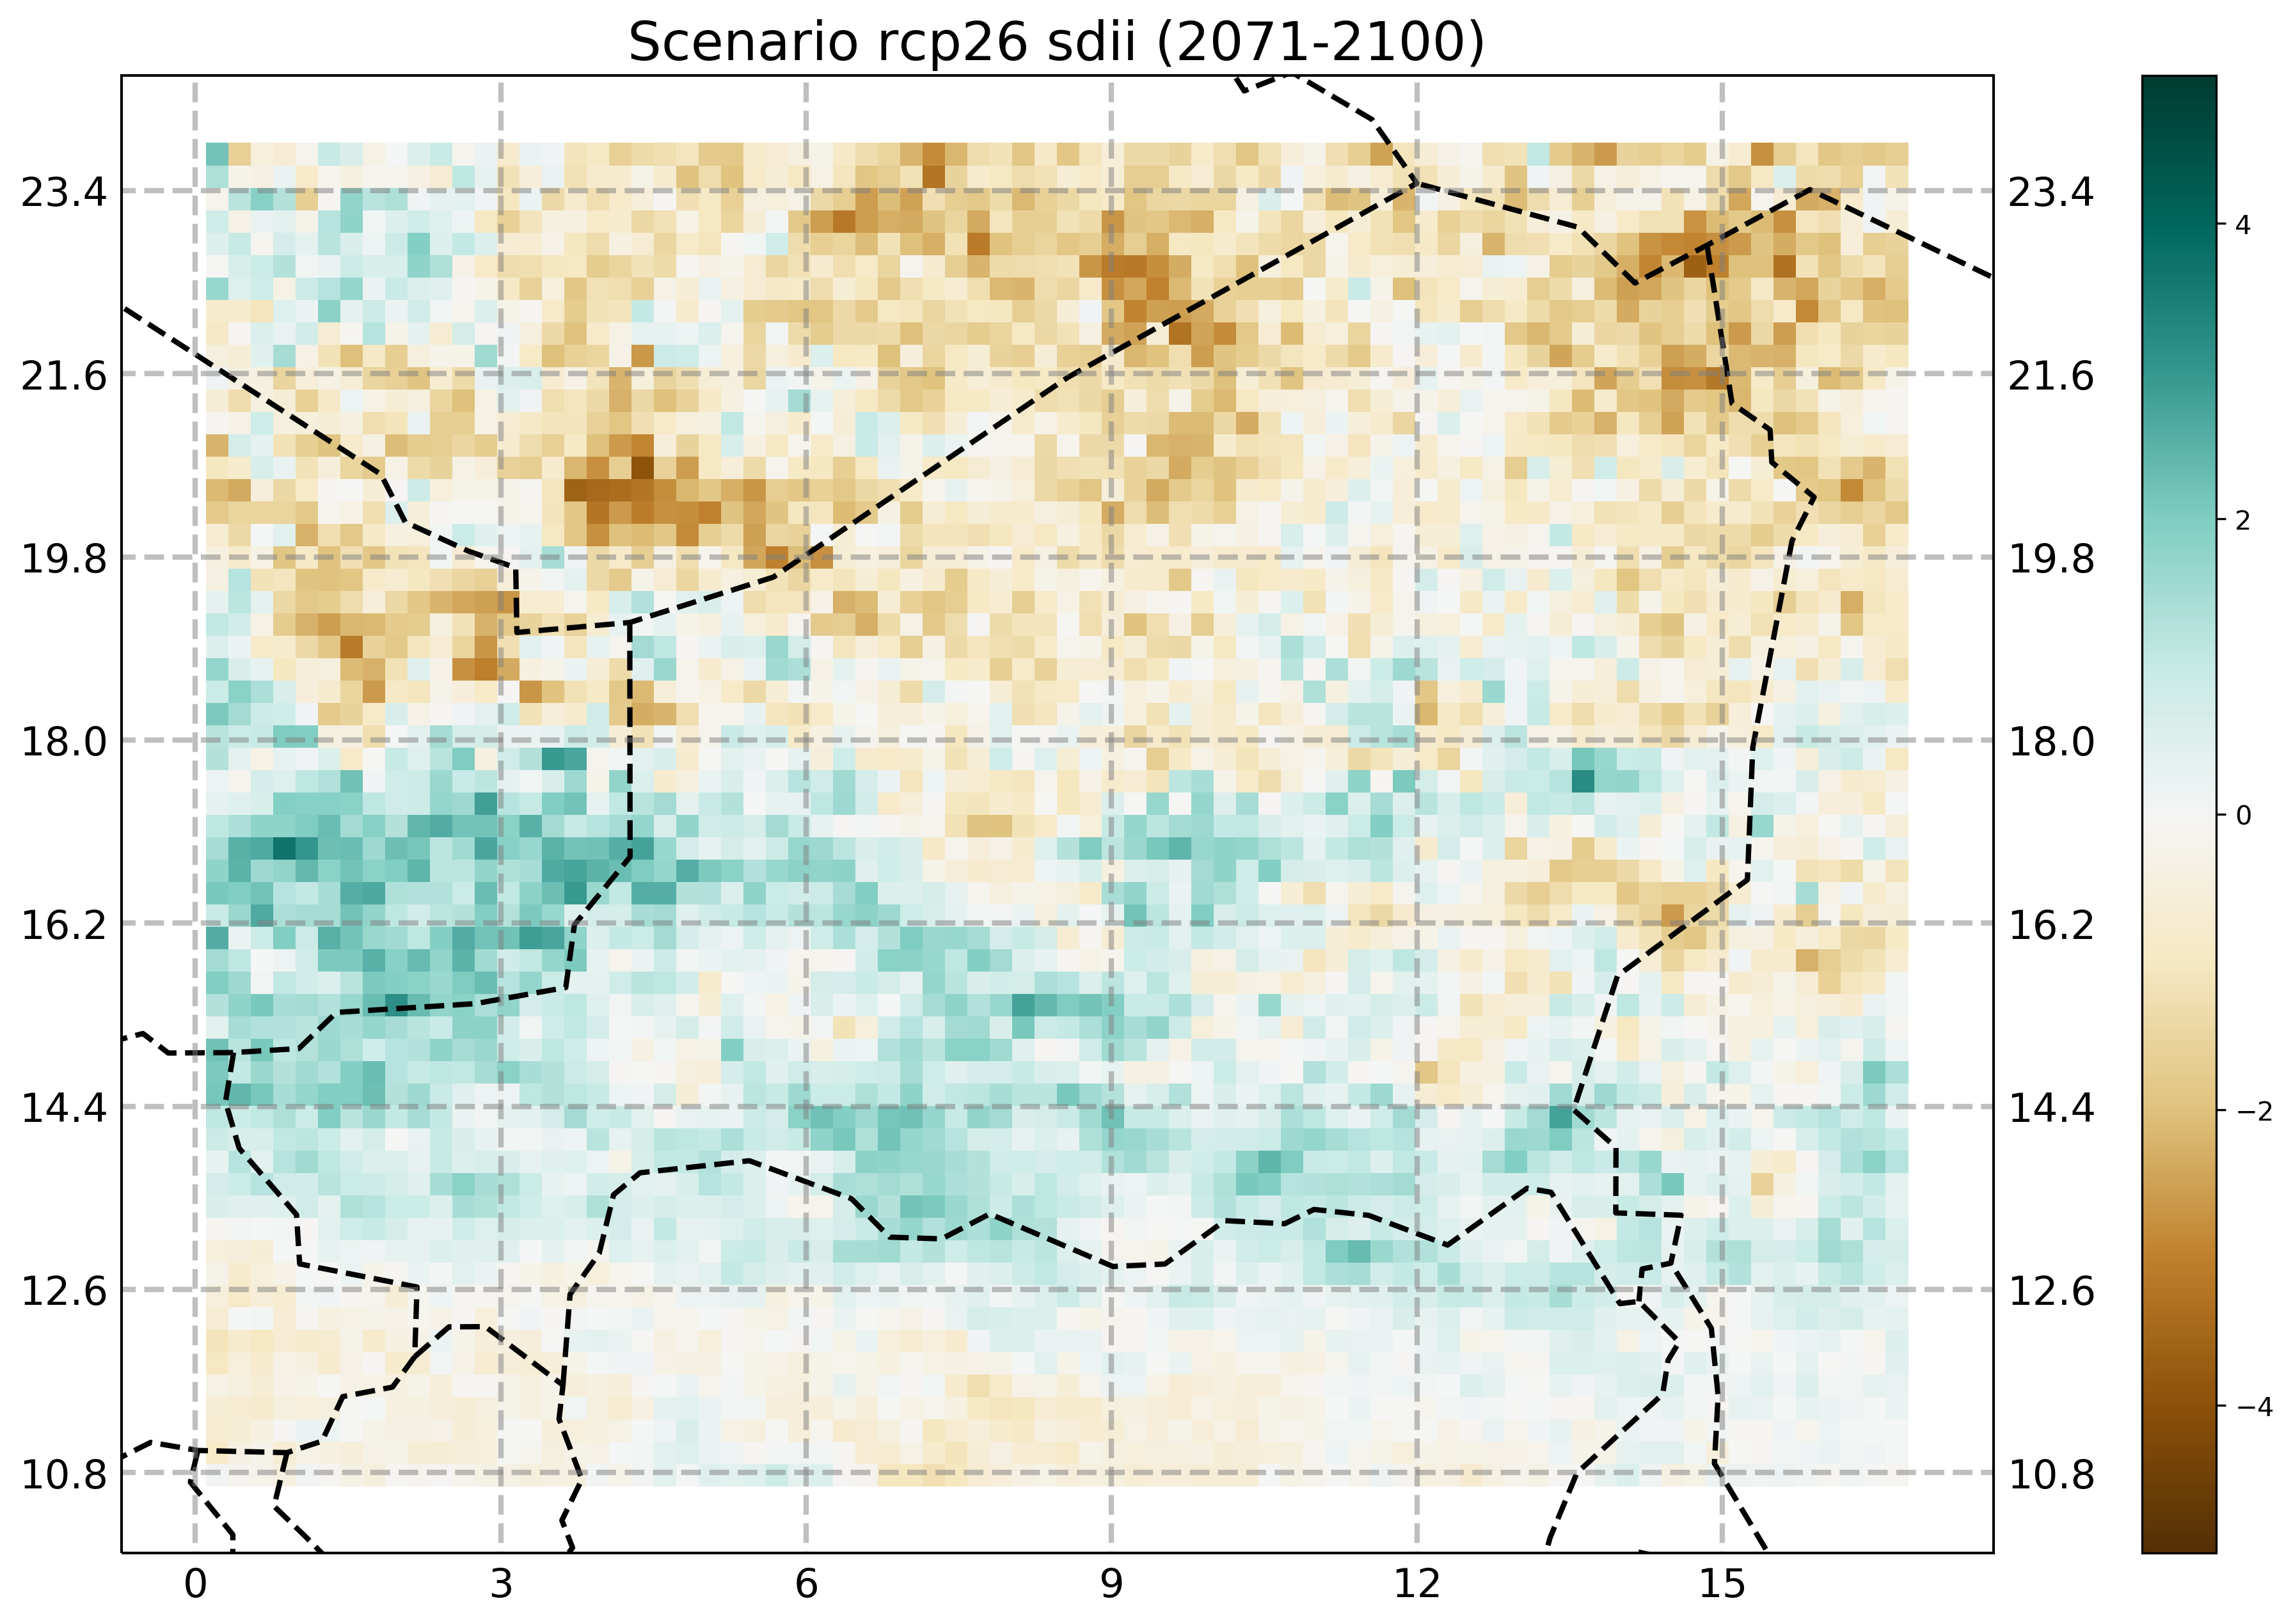

In [480]:
out_file = '/home/nils/nap_niger/NAP_Niger/pics/CCsignal_{}_{}_{}.png'.format(indicie, 
                                                                                 experiment,
#                                                                                  datestart_proj,
                                                                                 dateend_proj )

request.urlretrieve(out.get()[2], out_file)
Image(out_file)


In [31]:
# fp_i.spatial_analog?

In [35]:
# niamey = '13.534,2.0918'


# ref = [f for f in prInd_bbox if '_r1i1p1_GERICS-REMO2015_v1_yr' in f and fr in f and 'historical' in f and 'rx1day' in f]
# proj = [f for f in prInd_bbox if '_r1i1p1_GERICS-REMO2015_v1_yr' in f and fr in f and experiment in f and 'rx1day' in f]

In [37]:
# out = fp_i.spatial_analog( candidate=proj,
#                     target=ref,
#                     location=niamey,
#                     indices=['rx1day'],
#                     dist='kldiv',
#                     datestartcandidate=dates[0],
#                     dateendcandidate=dates[1],
#                     datestarttarget=dates[4],
#                     dateendtarget=dates[5])


 owslib.wps.WPSException : {'code': 'NoApplicableCode', 'locator': 'None', 'text': 'Process error: method=wps_spatial_analog.py._handler, line=210, msg=Target extraction failed A subset operation on variable "time" returned empty.'}
